In [6]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata
from sklearn.preprocessing import OneHotEncoder

In [7]:
tox_adata = sc.read_h5ad("/project/gilad/jpopp/cellcipher/data/Tox1-full/single_cell_objects/filtered_pflog1ppfnorm.hvg.umap_embedding.h5ad")
tox_adata_raw = sc.read_h5ad("/project/gilad/jpopp/cellcipher/data/Tox1-full/single_cell_objects/filtered.h5ad")

AnnDataReadError: Above error raised while reading key '/layers' of type <class 'h5py._hl.group.Group'> from /.

In [8]:
assert tox_adata.obs.index.equals(tox_adata_raw.obs.index)

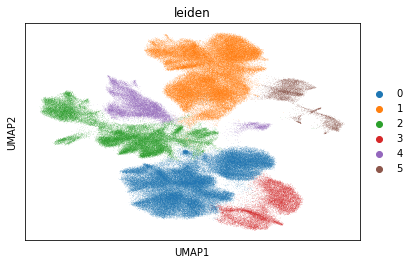

In [3]:
sc.pl.umap(tox_adata, color='leiden')

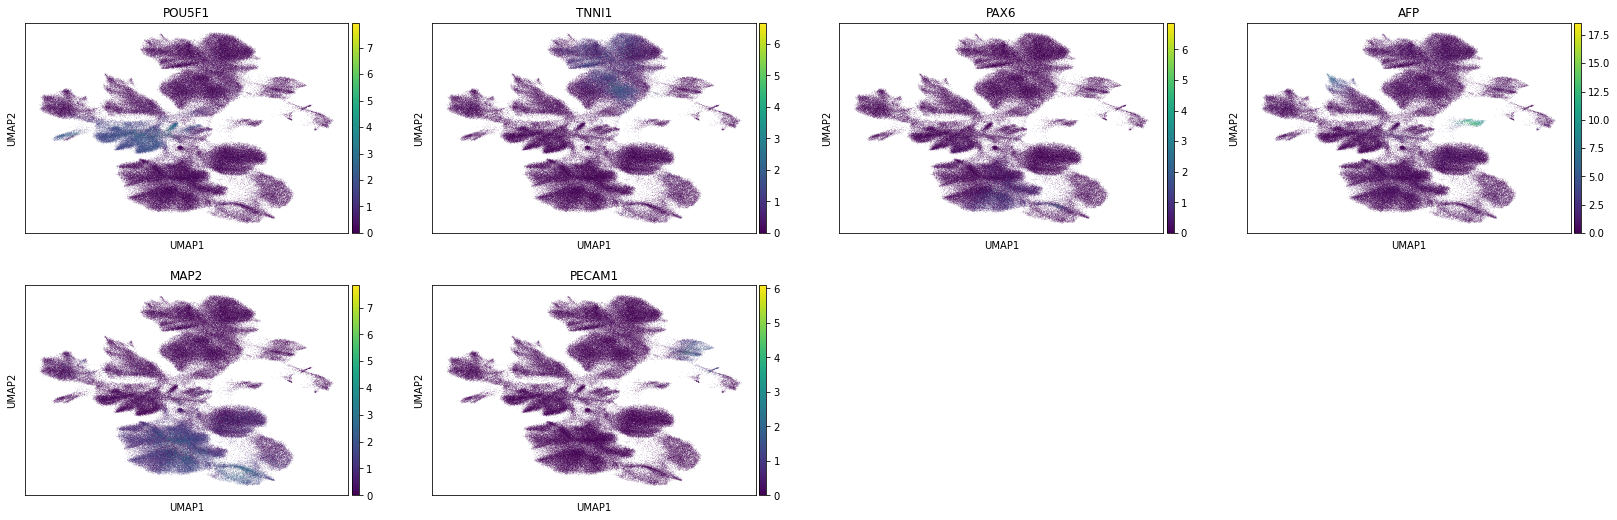

In [5]:
sc.pl.umap(tox_adata, color=['POU5F1', 'TNNI1', 'PAX6', 'AFP', 'MAP2', 'PECAM1'])

In [6]:
celltype_labels = {0: 'earlyecto', 1:'mesoderm', 2: 'pluripotent', 3: 'neuron', 4: 'endoderm', 5: 'endothelial'}

In [9]:
tox_adata.obs['celltype'] = [celltype_labels[int(c)] for c in tox_adata.obs['leiden']]

In [10]:
tox_adata.obs

,sample_id,sample_barcode,donor_id,prob_max,prob_doublet,n_vars,best_singlet,best_doublet,doublet_logLikRatio,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,treatment,_scvi_batch,_scvi_labels,leiden,celltype
cell,,,,,,,,,,,,,,,,,,,
AAACCCAAGGCTCTCG-1,YG-KR-10X-13s-Tox-16,AAACCCAAGGCTCTCG,NA19210,1.000,7.690000e-08,84,NA19210,"NA19210,NA18912",-13.866,1606,1606,2584.0,73.0,2.825078,Pergolide,0,0,5,endothelial
AAACCCACAATGGCCC-1,YG-KR-10X-13s-Tox-16,AAACCCACAATGGCCC,NA18912,1.000,5.800000e-05,61,NA18912,"NA19210,NA19093",-7.240,1338,1338,1951.0,41.0,2.101486,Pergolide,0,0,3,neuron
AAACCCACAGGACATG-1,YG-KR-10X-13s-Tox-16,AAACCCACAGGACATG,NA19204,0.994,3.470000e-03,43,NA19204,"NA19210,NA18912",-3.142,1099,1099,1524.0,100.0,6.561680,Pergolide,0,0,2,pluripotent
AAACCCACAGGCACAA-1,YG-KR-10X-13s-Tox-16,AAACCCACAGGCACAA,NA18912,1.000,1.060000e-05,103,NA18912,"NA18912,NA18519",-8.937,2578,2578,4258.0,116.0,2.724284,Pergolide,0,0,0,earlyecto
AAACCCACAGTGTATC-1,YG-KR-10X-13s-Tox-16,AAACCCACAGTGTATC,NA18912,1.000,1.070000e-05,44,NA18912,"NA18912,NA18519",-8.934,1133,1133,1440.0,16.0,1.111111,Pergolide,0,0,1,mesoderm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTTCAAAGA-17,YG-KR-10X-13s-Tox-07,TTTGTTGGTTCAAAGA,NA19204,1.000,4.950000e-33,510,NA19204,"NA18912,NA19210",-72.396,3616,3616,8773.0,333.0,3.795737,BIA,0,0,1,mesoderm
TTTGTTGGTTGCATTG-17,YG-KR-10X-13s-Tox-07,TTTGTTGGTTGCATTG,NA18912,1.000,2.810000e-23,464,NA18912,"NA18519,NA18912",-49.936,3419,3419,6981.0,286.0,4.096834,BIA,0,0,0,earlyecto
TTTGTTGTCAGATTGC-17,YG-KR-10X-13s-Tox-07,TTTGTTGTCAGATTGC,NA19210,1.000,4.010000e-20,385,NA19210,"NA19210,NA19204",-42.671,2686,2686,4890.0,199.0,4.069530,BIA,0,0,0,earlyecto


In [13]:
cell_subset = tox_adata.obs[['sample_id', 'donor_id', 'celltype']]
cell_subset['pseudobulk_sample'] = cell_subset['sample_id'].astype(str) + '_' + cell_subset['donor_id'].astype(str) + '_' + cell_subset['celltype'].astype(str)

/tmp/jobs/29859280/ipykernel_186757/782936707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_subset['pseudobulk_sample'] = cell_subset['sample_id'].astype(str) + '_' + cell_subset['donor_id'].astype(str) + '_' + cell_subset['celltype'].astype(str)


In [14]:
onehot = OneHotEncoder(sparse=True).fit_transform(cell_subset[['pseudobulk_sample']])
onehot

<234913x449 sparse matrix of type '<class 'numpy.float64'>'
	with 234913 stored elements in Compressed Sparse Row format>

In [22]:
pseudobulk_sum = tox_adata_raw.X.transpose() * onehot

In [23]:
pseudobulk_sum = pd.DataFrame(pseudobulk_sum.todense(),
                              index=tox_adata_raw.var_names, 
                              columns=cell_subset['pseudobulk_sample'].astype("category").cat.categories).astype(int)

In [25]:
pseudobulk_sum.to_csv("/project2/gilad/jpopp/cellcipher/data_071023/pseudobulk_expression.tsv", sep="\t")

In [26]:
treatment_dict = tox_adata.obs[['sample_id', 'treatment']].drop_duplicates()

In [28]:
treatment_dict.to_csv("/project2/gilad/jpopp/cellcipher/data_071023/treatment_dict.tsv", sep="\t", index=False)